## Assignment 1: due June 14.
In your favorite programming language, write code to generate a random network consisting of 1,000 nodes and at least 10,000 edges. Save the network as an edge list, a METIS file, and in GraphML format. Plot the degree distribution. Report the number of isolated nodes and connected components. Your code should accompany your write up along with the three data files (edge list as tsv, METIS, GraphML). Thus, you could just upload a folder in here that is appropriately named. Code can be reported as a link to a Github repo. Assignments should be written up using LaTeX and saved as a PDF. 

In [35]:
import numpy as np
import pandas as pd


In [36]:
nodes = [str(i) for i in range(1,1001)]

len(nodes)

1000

In [37]:
# gotten from here: https://stackoverflow.com/questions/38555385/removing-duplicate-edges-from-graph-in-python-list

def normalize(edge):
    n1, n2 = edge
    if n1 > n2: # use a custom compare function if desired
        n1, n2 = n2, n1
    return (n1, n2)

In [38]:
edge_list = []
edge_map = {i:[] for i in nodes}

n_edges = 15000

def populate_edge_list(n, edge_list, nodes):

    for _ in range(n):
        from_node = np.random.randint(0,len(nodes))
        to_node = np.random.randint(0,len(nodes))

        while from_node == to_node:
            to_node = np.random.randint(0,len(nodes))

        from_node, to_node = normalize((nodes[from_node], nodes[to_node]))
        
        edge_list.append((from_node, to_node))

        edge_map[from_node].append(to_node)
    


while len(edge_list) < n_edges:

    populate_edge_list(n_edges - len(edge_list), edge_list, nodes)
    edge_list = list(set(edge_list))

len(edge_list)

15000

In [44]:
import csv

# gotten from here: https://stackoverflow.com/questions/63107145/writing-to-a-tsv-file-from-multiple-list-in-python

with open('data/EdgeList/output.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'# Nodes: {len(nodes)} Edges: {n_edges}'])
    tsv_output.writerow(['# from_node, to_node'])
    for from_node, to_node in edge_list:
        tsv_output.writerow([f"{from_node} {to_node}"])



with open('data/METIS//data.metis', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    tsv_output.writerow([f'{len(nodes)} {n_edges}'])
    for node in nodes:
        line = " ".join(edge_map[node])
        if len(line)>1:
            tsv_output.writerow([line])



In [47]:
import networkx as nx 

G = nx.read_edgelist("./data/EdgeList/output.tsv", nodetype=int)

G

In [48]:
nx.write_graphml(G, "./data/GraphML/ArtifitialGraph.xml")

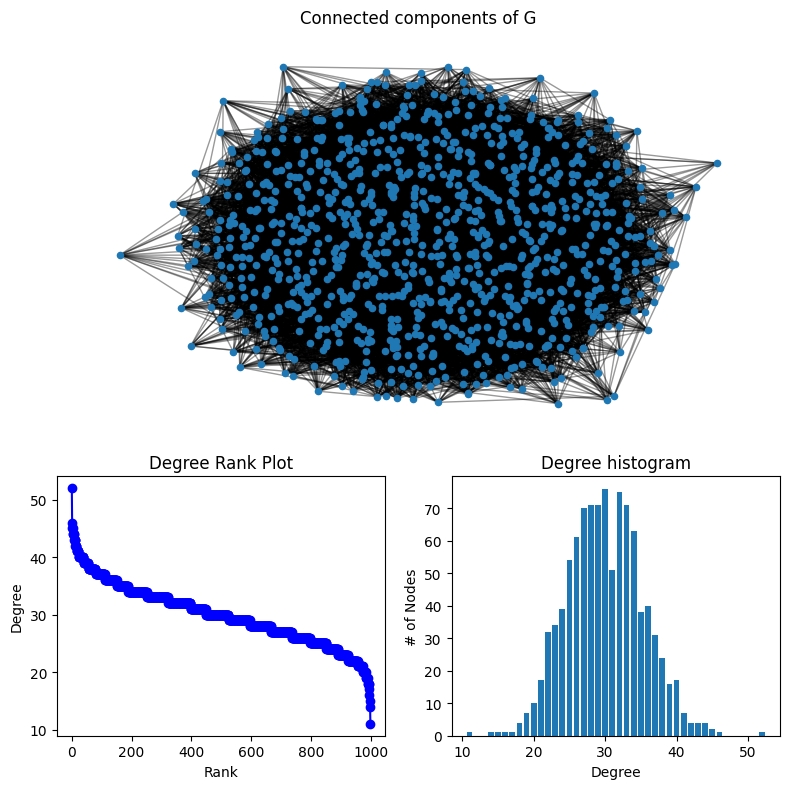

In [49]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [50]:
nx.number_connected_components(G)

1

In [51]:
nx.number_of_isolates(G)

0